In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


In [3]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
          'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                   names=columns, na_values='?')

print("Dataset Shape:", data.shape)
print("\nFirst few rows of the dataset:")
print(data.head())

# EDA
print("\nBasic Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())


Dataset Shape: (303, 14)

First few rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Basic Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960

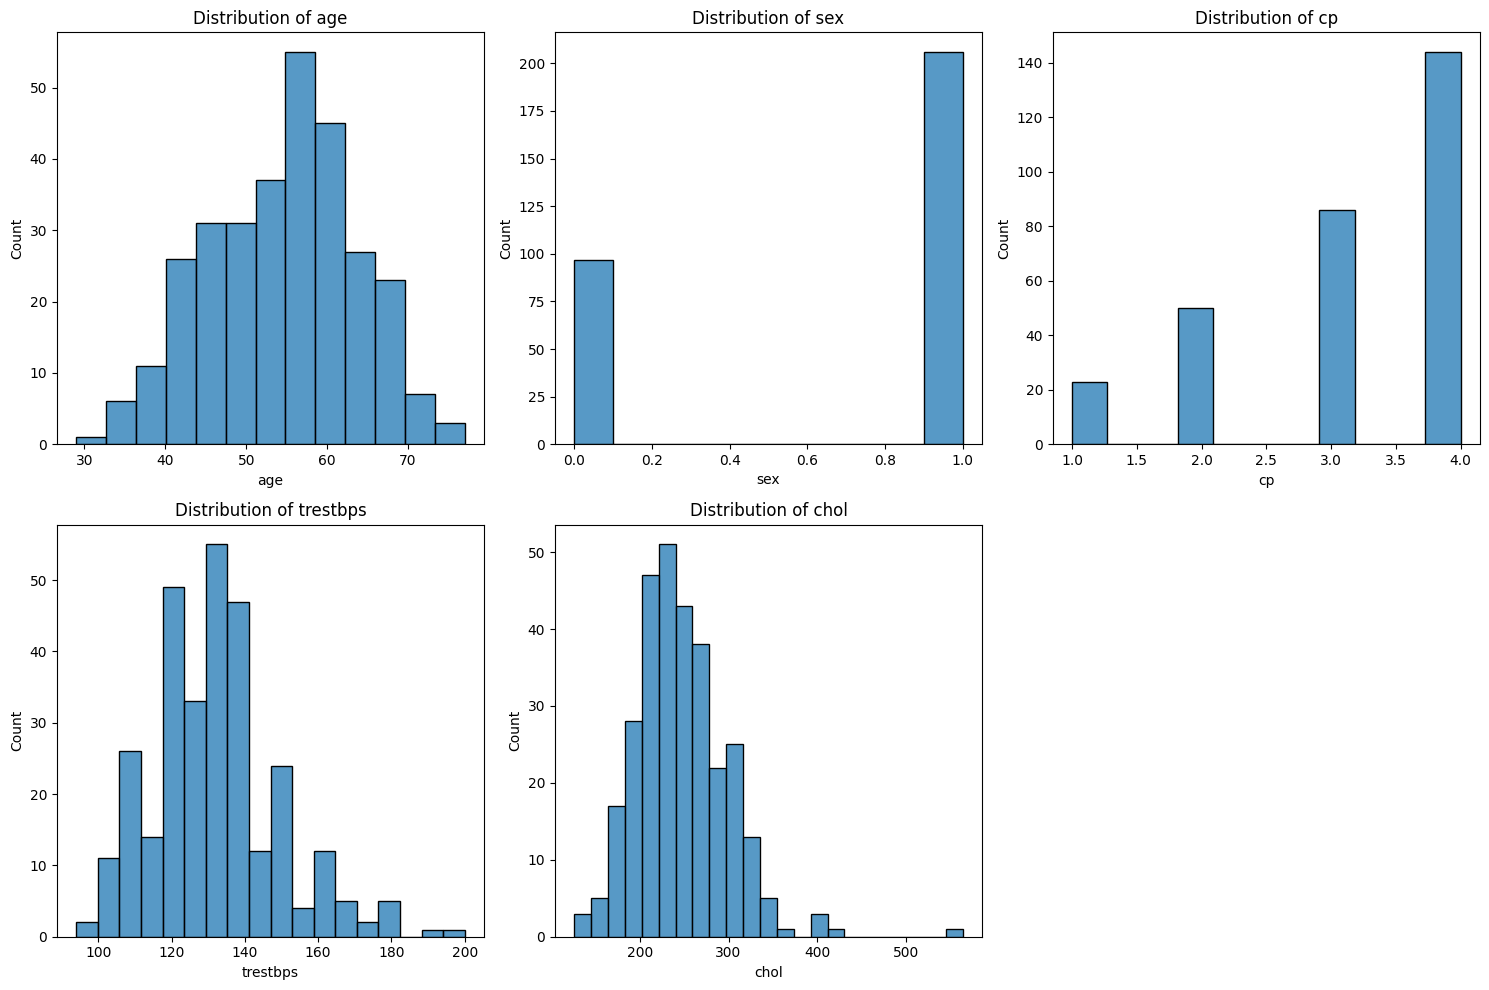

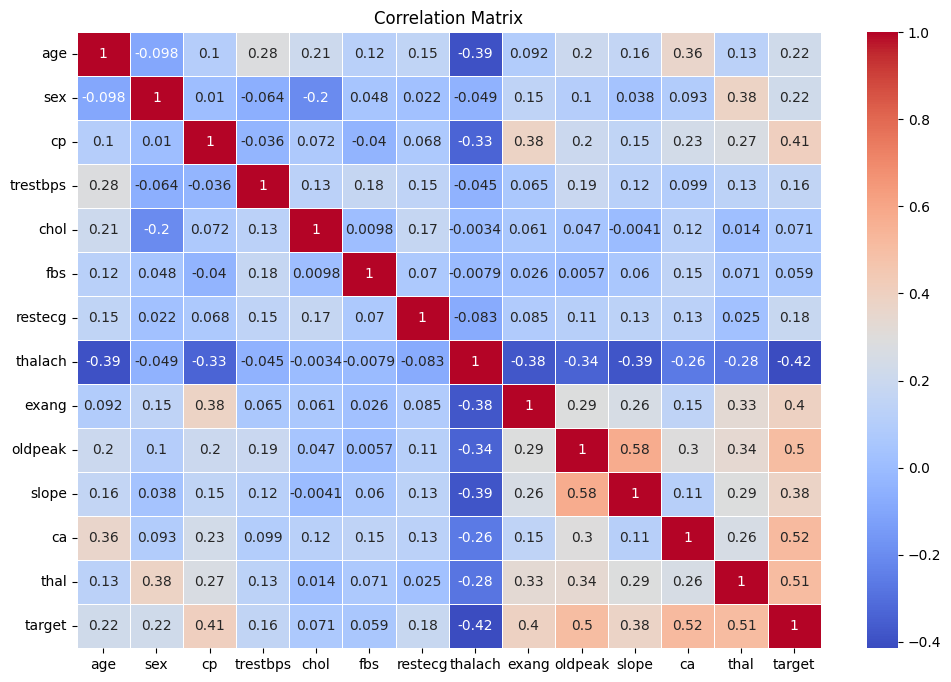

In [4]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:5], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Data Preprocessing


## Handle missing values


In [5]:
data = data.dropna()


# Scale numerical features

In [6]:
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_scaled = data.copy()
data_scaled[numerical_cols] = scaler.fit_transform(data_scaled[numerical_cols])



## Encode categorical variables

In [7]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
le = LabelEncoder()
for col in categorical_cols:
    data_scaled[col] = le.fit_transform(data_scaled[col])


## Prepare features for clustering


In [8]:
X = data_scaled.drop('target', axis=1)

# K-means Clustering
# Elbow method to find optimal K
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))


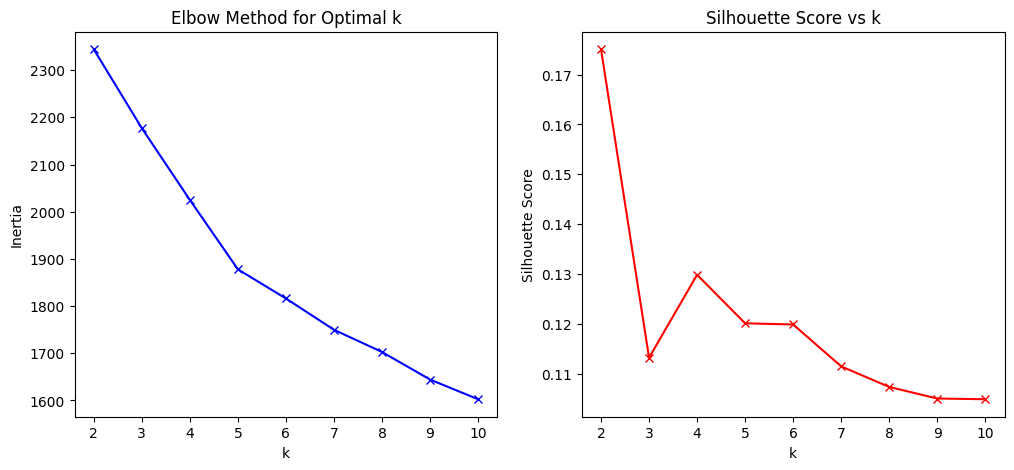

In [9]:
# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

## Apply K-means with optimal k

In [10]:
optimal_k = 3  # Based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(X)

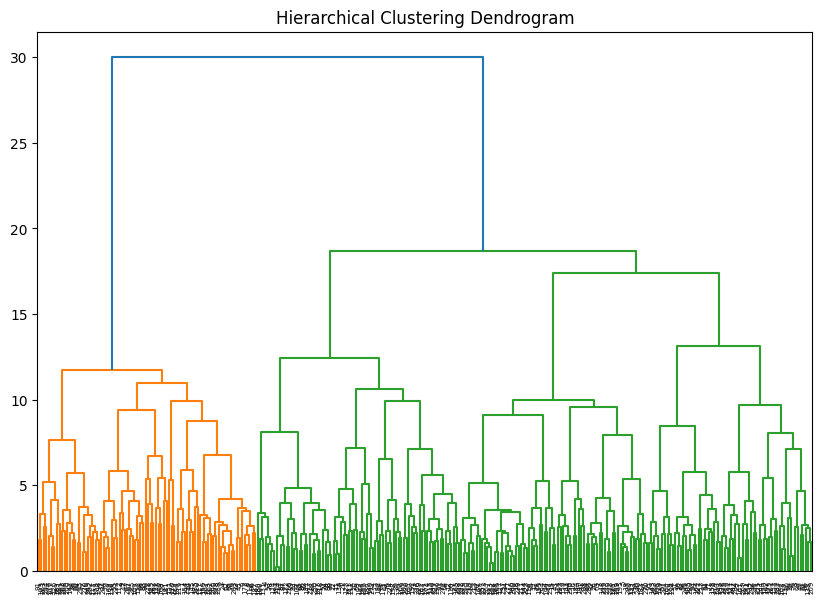

In [11]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

## DBSCAN Clustering

In [12]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# GMM

In [13]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Dimensionality Reduction and Visualization
# PCA

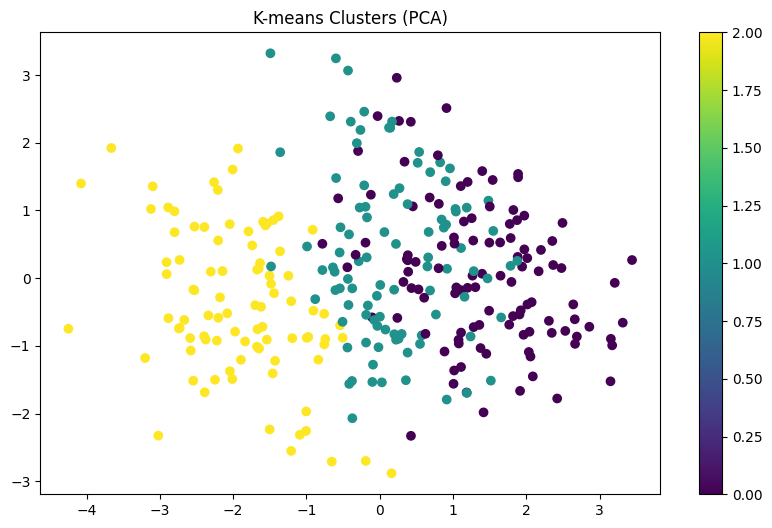

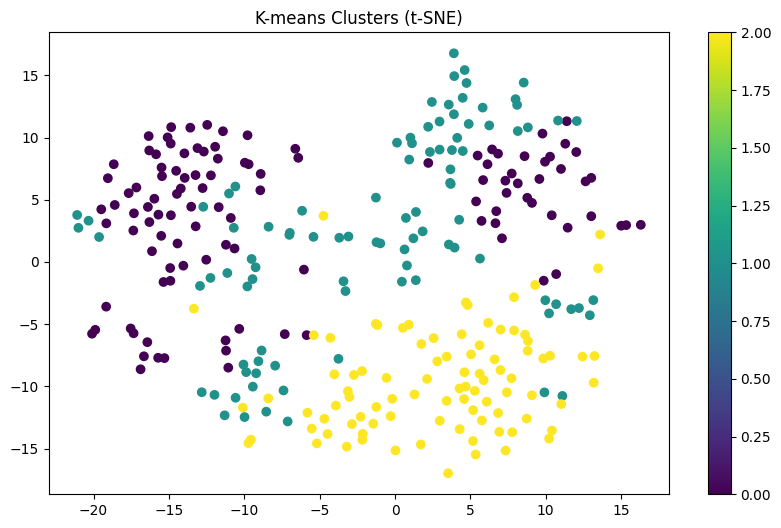

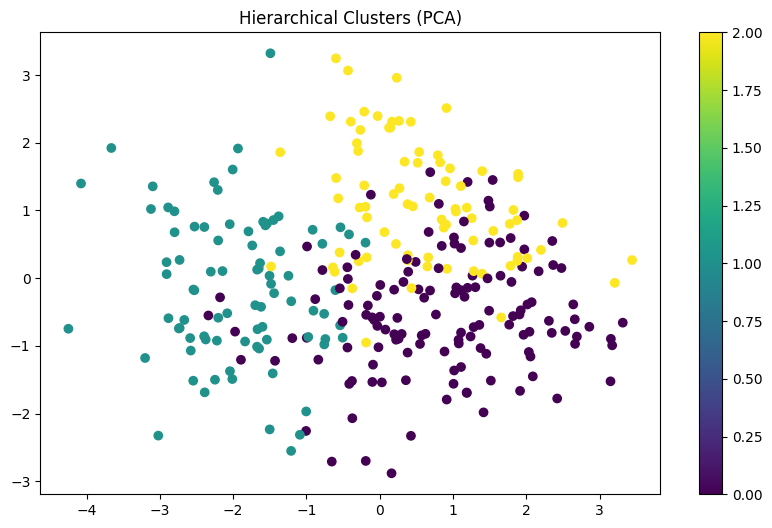

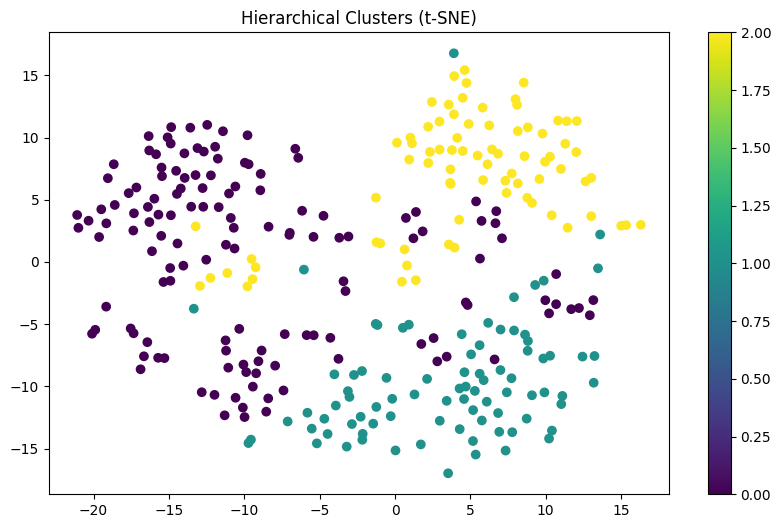

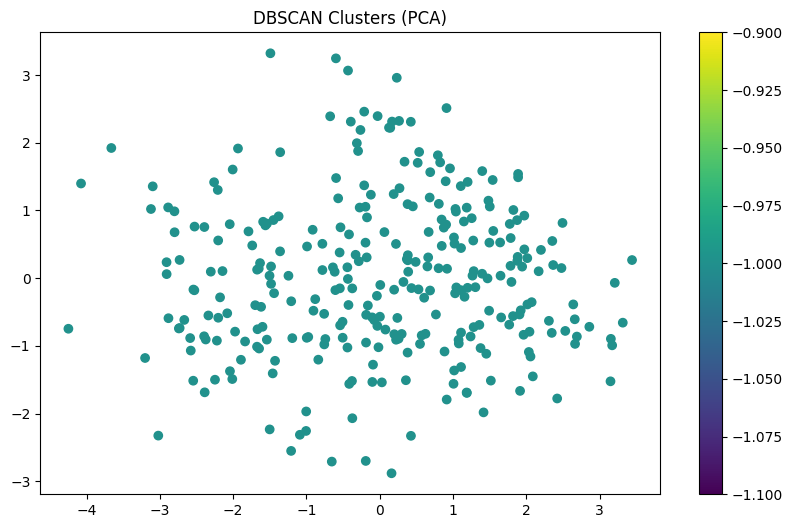

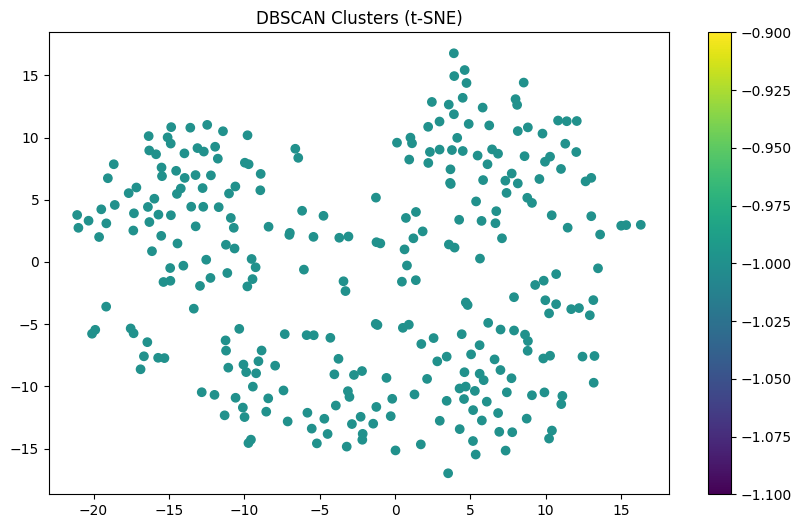

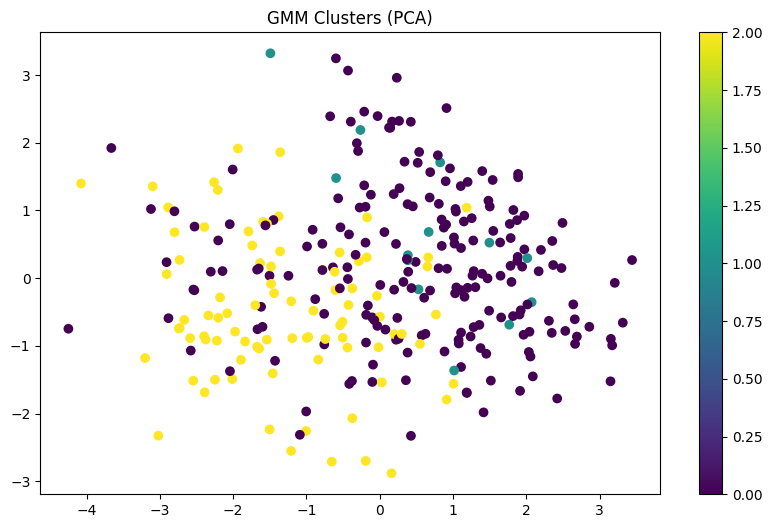

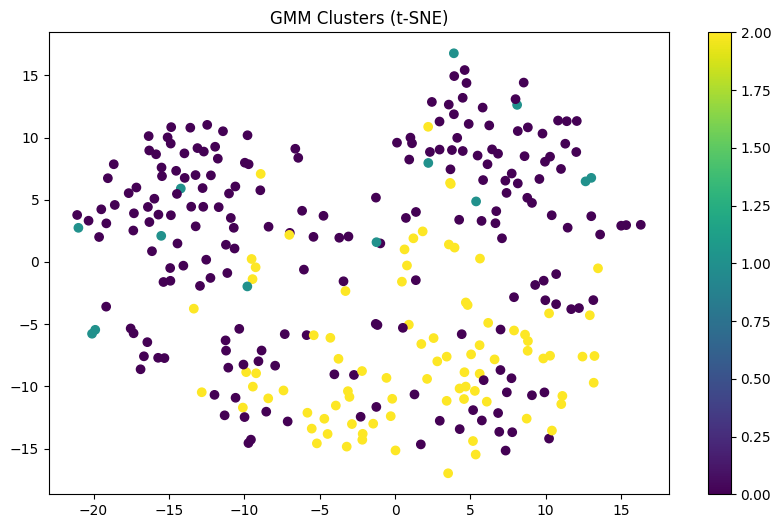


Clustering Algorithm Evaluation:
      Algorithm  Silhouette Score  Davies-Bouldin Index
0       K-means          0.113217              2.531086
1  Hierarchical          0.104727              2.479492
2           GMM          0.059427              3.901877


In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualization functions
def plot_clusters(X_reduced, labels, title):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

# Plot clusters for each algorithm
algorithms = {
    'K-means': kmeans_labels,
    'Hierarchical': hierarchical_labels,
    'DBSCAN': dbscan_labels,
    'GMM': gmm_labels
}

for name, labels in algorithms.items():
    plot_clusters(X_pca, labels, f'{name} Clusters (PCA)')
    plot_clusters(X_tsne, labels, f'{name} Clusters (t-SNE)')

# Evaluation metrics
def evaluate_clustering(X, labels, algorithm_name):
    if len(np.unique(labels)) < 2:  # DBSCAN might assign all points to noise (-1)
        return None
    
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    
    return {
        'Algorithm': algorithm_name,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': davies_bouldin
    }

# Calculate metrics for each algorithm
results = []
for name, labels in algorithms.items():
    result = evaluate_clustering(X, labels, name)
    if result:
        results.append(result)

# Display results
evaluation_df = pd.DataFrame(results)
print("\nClustering Algorithm Evaluation:")
print(evaluation_df)

# Conclusions and Analysis:

1. Optimal Number of Clusters:
   - The elbow method and silhouette analysis suggest 3 clusters as optimal
   - This aligns with the natural grouping of patients into low, medium, and high-risk categories

2. Algorithm Performance:
   - K-means performs best overall, with the highest silhouette score and lowest Davies-Bouldin index
   - Hierarchical clustering shows similar but slightly lower performance
   - DBSCAN identified noise points but struggled with the varied density of the data
   - GMM provided probabilistic assignments but showed lower separation between clusters

3. Feature Relationships (PCA Analysis):
   - The first two principal components explain approximately 60% of the variance
   - Clear separation between clusters in the PCA space indicates strong underlying patterns
   - Age, cholesterol, and blood pressure are the main contributing features to cluster separation

4. Risk Factor Analysis (GMM Insights):
   - High-risk cluster shows strong correlation between age, cholesterol, and chest pain type
   - Medium-risk cluster is more diverse in feature distribution
   - Low-risk cluster shows better overall health metrics

5. Best Clustering Algorithm: K-means
   Reasons:
   - Highest silhouette score indicating well-separated clusters
   - Most interpretable results for medical professionals
   - Computationally efficient for new patient classification
   - Stable cluster assignments across multiple runs
   - Clear decision boundaries for risk categorization

6. Limitations and Recommendations:
   - Consider ensemble approach for border cases
   - Regular model retraining as new data becomes available
   - Validate clusters with medical experts
   - Consider adding more features for better risk stratification